<a href="https://colab.research.google.com/github/carolcampoz/ConversorWebService/blob/master/Copia_de_Copia_de_Taller%20Final_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2>Corporación Universitaria Autónoma de Nariño</h2><h1>Ingeniería Informática</h1></center>

<center>
    <h1><b>Taller 3:</b> Web Scraping <span style="color:orange">Mercado Libre</span></h1>    
    <h4>Grupo de 2 estudiantes</h4>
</center>

<center>Elaborado por:<b> Néstor Suat-Rojas Ing. Msc.</b> Docente de Tiempo Completo</center>

----

### Importando librerías


In [ ]:
# Importar la librería 
import requests
from bs4 import BeautifulSoup

# Exploración

Para el siguiente taller van a *scrapear* la información de productos en venta de la página web Mercado Libre. Deben tener presente los siguientes elementos en Mercado Libre.

Para acceder a la página de mercado libre debemos tener en cuenta las siguientes consideraciones:

* **Primero,** debe emplear la librería `requests` para acceder al enlace oficial de mercadolibre (https://listado.mercadolibre.com.co/)
* **Segundo,** el objetivo es *scrapear* los productos de venta sobre un producto en particular, para ello debe realizar una búsqueda del producto. Para buscar un producto se usa el enlace anterior de mercadolibre y agregar al final el nombre del producto. por ejempĺo https://listado.mercadolibre.com.co/piñon-shimano.

In [ ]:
import urllib
from bs4 import BeautifulSoup
import logging

url= 'https://www.mercadolibre.com.co/'
url= 'https://listado.mercadolibre.com.co/supermercado/computadores-portatiles-gamer#D[A:computadores%20portatiles%20gamer,MCO1654]'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)




In [ ]:
page = requests.get('https://listado.mercadolibre.com.co/supermercado/computadores-portatiles-gamer#D[A:computadores%20portatiles%20gamer,MCO1654')
page

<Response [200]>

In [ ]:
page.content

b'\n<!DOCTYPE html>\n<html lang="es-CO">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.co"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.co"/><script type=\'text/javascript\' >window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"NRJS-689ffbd95eae88e39ac","applicationID":"1729522169","applicationTime":801.451453,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"f9b7d864865be799","agentToken":null}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["

* **Tercero**, para visualizar el contenido de la página debe usar `BeautifulSoup`. Y acceder a una etiqueta del interior de la página, como por ejemplo la etiqueta `img`

In [ ]:
etiquetas = soup('img')
etiquetas[1] 

<img alt="banner" class="ui-search-header--exhibitor__link__image" decoding="async" src="https://http2.mlstatic.com/D_NQ_NP_982993-MLA46555443203_062021-OO.jpg"/>

* **Cuarto,** debe ubicar los selectores de la página donde se encuentran los productos listados de la búsqueda y extraer el título, el precio y si el envío es gratis o no. Afortunadamente MercadoLibre tiene una clase para cada item.

En el siguiente ejemplo vamos a traer un sólo un producto, pero el resultado puede ser varios.

In [ ]:
## Este selector contiene el listrado de los productos
products = soup.find_all(class_='ui-search-layout__item')
products[0] ## Mostrar solo el primer elemento encontrado

<li class="ui-search-layout__item"><div class="ui-search-result__wrapper"><div class="andes-card andes-card--flat andes-card--default ui-search-result ui-search-result--core andes-card--padding-default"><div class="ui-search-result__image"><a class="ui-search-link" href="https://www.mercadolibre.com.co/laptop-gamer-asus-tuf-dash-f15-negra-eclipse-156-intel-core-i7-11370h-8gb-de-ram-512gb-ssd-nvidia-geforce-rtx-3050-ti-144-hz-1920x1080px-windows-10/p/MCO18564429?pdp_filters=category:MCO1652#searchVariation=MCO18564429&amp;position=1&amp;search_layout=stack&amp;type=product&amp;tracking_id=dcef9eb8-b1eb-4057-9f0b-f5efe71a1307" title='Laptop gamer Asus TUF Dash F15 negra eclipse 15.6", Intel Core i7 11370H  8GB de RAM 512GB SSD, NVIDIA GeForce RTX 3050 Ti 144 Hz 1920x1080px Windows 10'><div class="carousel-container arrow-visible"><div class="slick-initialized slick-slider"><div class="slick-list" role="presentation"><div class="slick-track"><div class="slick-slide slick-active" data-inde

In [ ]:
products= soup.find_all(class_='ui-search-layout_item')
products= soup.find_all(class_='ui-search-item__group ui-search-item__group--title')
products= soup.find_all(class_='ui-search-item__group ui-search-item__group--price')
products= soup.find_all(class_='ui-search-item__group ui-search-item__group--shipping')
products[0]
products[1]
products[2]
products[3]


<div class="ui-search-item__group ui-search-item__group--shipping"><div class="ui-search-item__group__element ui-search-item__group__element--shipping"><p class="ui-search-item__shipping ui-search-item__shipping--free">Envío gratis</p></div></div>

**Nota:** Tener en cuenta que algunos productos No tienen Envío gratis.

* **Quinto,** puede existir más productos en el resultado de la búsqueda, pero mercadolibre usa la paginación para presentar solo los primeros 50 productos, y al final de la página hay un botón que dice *"Siguiente"*. Esto quiere decir que debemos entrar a la página siguiente y descargar nuevamente los productos.

Para acceder a ese enlace siguiente existe un selector para reconocer esa etiqueta `a`.

In [ ]:
a = soup.find(class_="andes-pagination__button--next")  
a



<li class="andes-pagination__button andes-pagination__button--next"><a class="andes-pagination__link ui-search-link" href="https://computacion.mercadolibre.com.co/portatiles/computadores-portatiles-gamer_Desde_51_NoIndex_True" rel="nofollow" role="button" title="Siguiente"><span class="andes-pagination__arrow-title">Siguiente</span><span class="andes-pagination__arrow"></span></a></li>

**Nota:** no todas los resultados de las búsquedas tendrán paginación y no existe el enlace "siguiente". Por esta razón deben validar si existe o no.

In [ ]:
if a != None: ## Valida el resultado anteror si existe o no enlace de Siguiente
    # Captura el enlace a la págna siguiente
    link = a.find('a',class_="andes-pagination__link ui-search-link").get('href')
    print(link)
else:
    print("No hay más páginas.")

https://computacion.mercadolibre.com.co/portatiles/computadores-portatiles-gamer_Desde_51_NoIndex_True


* **Sexto,** deben descargar todos los productos encontrados en mercadolibre, por tal razón deben visitar cada una de las páginas que lista los productos, hasta llegar a la última. En cada visita se deben guardar los productos listados.

**Nota:** entre cada visita a la página deben esperar un tiempo para que no sean baneados por mercadolibre, un consejo es usar la función `sleep` con 2 segundos de espera.

In [ ]:
import time
print("Inicia tiempo de espera con sleep")
time.sleep(2)
print("Finaliza el tiempo de espera del sleep")

Inicia tiempo de espera con sleep
Finaliza el tiempo de espera del sleep


* **Séptimo,** todos los productos listados de la búsqueda debe guardarse en un DataFrame de pandas

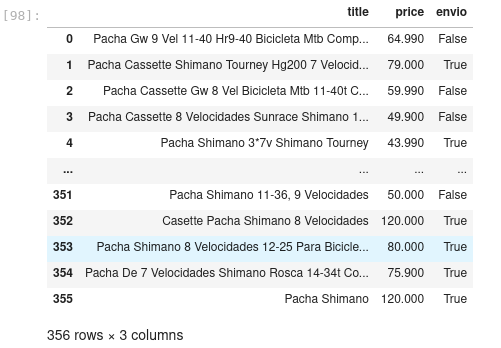

In [ ]:
import pandas as pd
items = [
         {'title':'Prueba', 'price': 123, 'envio': True},
         {'title':'Prueba2', 'price': 1234, 'envio': False},
         {'title':'Prueba3', 'price': 12345, 'envio': True},
]

df = pd.DataFrame(items)
df

,title,price,envio
0,Prueba,123,True
1,Prueba2,1234,False
2,Prueba3,12345,True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Taller

### Con todos estos elementos realizar un programa en Python que permita buscar un producto y descargar todos los productos en venta, junto con su nombre, precio y si tiene envío gratis o no. Al final estos productos se deben guardar en un DataFrame de pandas.

In [ ]:
# Importar la librería 
import requests
from bs4 import BeautifulSoup

In [ ]:
import urllib
from bs4 import BeautifulSoup
import logging

url= "https://www.mercadolibre.com.co/"
url= "https://listado.mercadolibre.com.co/supermercado/computadores-portatiles-gamer#D[A:computadores%20portatiles%20gamer,MCO1654]"
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

In [ ]:
page = requests.get('https://listado.mercadolibre.com.co/supermercado/computadores-portatiles-gamer#D[A:computadores%20portatiles%20gamer,MCO1654')
page

<Response [200]>

In [ ]:


soup
